In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
import numpy as np 
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from matplotlib import pyplot as plt

In [5]:
col_names = ['name', 'views_num', 'area', 'COORD_X', 'COORD_Y',
             'city', 'address', 'district', 'underground', 'rooms', 
             'floor', 'square', 'height', 'build_year', 'toilet',
             'balcony', 'pol', 'repair', 'price', 'terms_sale', 
             'property', 'shop', 'pharmacy', 'updated', 'agency', 'video']
col_names = [i.upper() for i in col_names]
col_names

df = pd.read_csv('temp_data.csv', sep=';', encoding='utf-8')
df.columns = col_names

In [6]:
df

,NAME,VIEWS_NUM,AREA,COORD_X,COORD_Y,CITY,ADDRESS,DISTRICT,UNDERGROUND,ROOMS,...,POL,REPAIR,PRICE,TERMS_SALE,PROPERTY,SHOP,PHARMACY,UPDATED,AGENCY,VIDEO
0,"Продажа двухкомнатной квартиры в Бресте, ул. К...","просмотров: сегодня – 14, за последние 7 дней...",Брестская область,23.702414,52.093037,г. Брест,Кирова ул.,NaN,NaN,2 / 2,...,NaN,хороший ремонт,"108 655 руб, 2 278 руб/кв.м.",обмен,частная,~ 100,~ 300,2019-08-24,АЛЬТЕРНАТИВА Брест,Фотографии и планировки объекта:
1,"Продажа 2-х комнатной квартиры в г. Гродно, пр...","просмотров: сегодня – 9, за последние 7 дней ...",Гродненская область,23.826022,53.675264,г. Гродно,NaN,NaN,NaN,2 / 2,...,ламинированные,евроремонт,"108 655 руб, 1 939 руб/кв.м.",чистая продажа,частная,~ 250,~ 350,2019-10-03,NaN,Фотографии и планировки объекта:
2,Двухкомнатная квартира на улице Сурганова,"просмотров: сегодня – 9, за последние 7 дней ...",Могилевская область,30.311008,53.921510,г. Могилев,"Сурганова ул., 12",NaN,NaN,2 / 2,...,ламинированные,отличный ремонт,"108 655 руб, 1 810 руб/кв.м.",чистая продажа,частная,NaN,NaN,2019-06-12,Империя жилья,Фотографии и планировки объекта:
3,2-хкомнатная квартира на Турова,"просмотров: сегодня – 10, за последние 7 дней...",Могилевская область,30.366255,53.944845,г. Могилев,"Турова ул., 18",NaN,NaN,2 / 2,...,линолеум,NaN,"108 655 руб, 1 646 руб/кв.м.",чистая продажа,частная,NaN,NaN,2019-11-14,Золотой Актив,Фотографии и планировки объекта:
4,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...","просмотров: сегодня – 16, за последние 7 дней...",Минская область,27.529830,53.868137,г. Минск,Кижеватова ул.,Октябрьский район,NaN,Фактически 2-комнатная квартира. Свободная пла...,...,NaN,NaN,"108 860 руб, 2 819 руб/кв.м.",чистая продажа,долевое строительство,~ 450,~ 500,NaN,ООО «Агентство недвижимости «Этажи»,Фотографии и планировки объекта:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...","просмотров: сегодня – 6, за последние 7 дней ...",Минская область,27.535964,53.867944,г. Минск,Аэродромная ул.,Октябрьский район,NaN,2 / 2,...,NaN,NaN,"144 696 руб, 3 012 руб/кв.м.",чистая продажа,долевое строительство,~ 350,~ 850,NaN,ООО «Агентство недвижимости «Этажи»,Фотографии и планировки объекта:
971,"Продажа 2-х комнатной квартиры, г. Заславль, у...","просмотров: сегодня – 6, за последние 7 дней ...",Минская область,27.275349,54.007829,г. Заславль,"Советская ул., 63/1",NaN,NaN,2 / 2,...,ламинированные,отличный ремонт,"145 352 руб, 2 278 руб/кв.м.",чистая продажа,частная,~ 600,NaN,2019-11-03,NaN,Фотографии и планировки объекта:
972,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...","просмотров: сегодня – 4, за последние 7 дней ...",Минская область,27.551132,53.871281,г. Минск,"Аэродромная ул., 28",Октябрьский район,"м. Ковальская Слобода (2020), расстояние ≈750м...",Свободная планировка (2-комнатная),...,бетонная стяжка,без отделки,"145 352 руб, 2 966 руб/кв.м.",чистая продажа,частная,~ 550,~ 600,2019-11-22,Академ-недвижимость,Фотографии и планировки объекта:
973,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...","просмотров: сегодня – 51, за последние 7 дней...",Минская область,27.551915,53.881177,г. Минск,"Жуковского ул., 9/1 Информация о доме",Октябрьский район,"м. Институт культуры, расстояние ≈1000м, (Моск...",2 / 2,...,линолеум,хороший ремонт,"145 352 руб, 3 100 руб/кв.м.",чистая продажа,гос.-приватизированная,~ 350,~ 200,2019-11-21,NaN,Фотографии и планировки объекта:


In [11]:
class ViewsEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        values = X['VIEWS_NUM']
        values = [re.findall(r'\d+', i)[0::2] for i in values]
        nums = np.array([[int(j) for j in i] for i in values])
        X['VIEWS_TODAY'], X['VIEWS_LAST_WEEK'] = nums[:, 0], nums[:, 1]
        X.drop(['VIEWS_NUM'], axis=1, inplace=True)
        return X

In [17]:
class NumericFilter(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['SHOP'] = X['SHOP'].map(lambda x: int(re.findall(r'\d+', x)[0]) if not pd.isna(x) else x)
        X['PHARMACY'] = X['PHARMACY'].map(lambda x: int(re.findall(r'\d+', x)[0]) if not pd.isna(x) else x)
        X['UNDERGROUND'] = X['UNDERGROUND'].map(lambda x: int(re.findall(r'\d+', x)[0]) if not pd.isna(x) else x)
        
        values = X['FLOOR']
        values = [re.findall(r'\d+', i) if not pd.isna(i) else np.array(['0', '0']) for i in values]
        nums = np.array([[int(j) for j in i] for i in values])
        X['FLOOR_CURRENT'], X['FLOOR_MAX'] = nums[:, 0], nums[:, 1]
        X.drop(['FLOOR'], axis=1, inplace=True)
        return X

In [13]:
class PriceTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['PRICE'] = X['PRICE'].map(self.price_prep)
        X = X[~X['PRICE'].isna()]
        return X
        
    def price_prep(s):    
        if s == 'Цена договорная':
            return float('nan')

        if s.find('млн') != -1:        
            s = s[:s.find('млн')].replace('\xa0', '')        
            return int(float(s.replace(',', '.'))*1000000)

        return int(s.split(',')[0].replace('руб', '').replace('\xa0', ''))

    

In [14]:
class DateTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['DAYS'] = (pd.to_datetime('2019-11-24') - pd.to_datetime(X['UPDATED'])).dt.days
        return X

In [15]:
ven = ViewsEncoder()
df = ven.fit_transform(df)

In [18]:
nf = NumericFilter()
df = nf.fit_transform(df)

TypeError: expected string or bytes-like object

In [19]:
dtr = DateTransformer()
df = dtr.fit_transform(df)

In [20]:
ptr = PriceTransformer()
df = ptr.fit_transform(df)

TypeError: price_prep() takes 1 positional argument but 2 were given

In [21]:
df

,NAME,AREA,COORD_X,COORD_Y,CITY,ADDRESS,DISTRICT,UNDERGROUND,ROOMS,FLOOR,...,TERMS_SALE,PROPERTY,SHOP,PHARMACY,UPDATED,AGENCY,VIDEO,VIEWS_TODAY,VIEWS_LAST_WEEK,DAYS
0,"Продажа двухкомнатной квартиры в Бресте, ул. К...",Брестская область,23.702414,52.093037,г. Брест,Кирова ул.,NaN,NaN,2 / 2,5 / 9,...,обмен,частная,100.0,300.0,2019-08-24,АЛЬТЕРНАТИВА Брест,Фотографии и планировки объекта:,14,17,92.0
1,"Продажа 2-х комнатной квартиры в г. Гродно, пр...",Гродненская область,23.826022,53.675264,г. Гродно,NaN,NaN,NaN,2 / 2,7 / 10,...,чистая продажа,частная,250.0,350.0,2019-10-03,NaN,Фотографии и планировки объекта:,9,25,52.0
2,Двухкомнатная квартира на улице Сурганова,Могилевская область,30.311008,53.921510,г. Могилев,"Сурганова ул., 12",NaN,NaN,2 / 2,3 / 9,...,чистая продажа,частная,NaN,NaN,2019-06-12,Империя жилья,Фотографии и планировки объекта:,9,35,165.0
3,2-хкомнатная квартира на Турова,Могилевская область,30.366255,53.944845,г. Могилев,"Турова ул., 18",NaN,NaN,2 / 2,7 / 10,...,чистая продажа,частная,NaN,NaN,2019-11-14,Золотой Актив,Фотографии и планировки объекта:,10,27,10.0
4,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...",Минская область,27.529830,53.868137,г. Минск,Кижеватова ул.,Октябрьский район,NaN,Фактически 2-комнатная квартира. Свободная пла...,2 / 25,...,чистая продажа,долевое строительство,450.0,500.0,NaN,ООО «Агентство недвижимости «Этажи»,Фотографии и планировки объекта:,16,103,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...",Минская область,27.535964,53.867944,г. Минск,Аэродромная ул.,Октябрьский район,NaN,2 / 2,7 / 8,...,чистая продажа,долевое строительство,350.0,850.0,NaN,ООО «Агентство недвижимости «Этажи»,Фотографии и планировки объекта:,6,35,NaN
971,"Продажа 2-х комнатной квартиры, г. Заславль, у...",Минская область,27.275349,54.007829,г. Заславль,"Советская ул., 63/1",NaN,NaN,2 / 2,4 / 10,...,чистая продажа,частная,600.0,NaN,2019-11-03,NaN,Фотографии и планировки объекта:,6,86,21.0
972,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...",Минская область,27.551132,53.871281,г. Минск,"Аэродромная ул., 28",Октябрьский район,2020.0,Свободная планировка (2-комнатная),6 / 25,...,чистая продажа,частная,550.0,600.0,2019-11-22,Академ-недвижимость,Фотографии и планировки объекта:,4,43,2.0
973,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...",Минская область,27.551915,53.881177,г. Минск,"Жуковского ул., 9/1 Информация о доме",Октябрьский район,1000.0,2 / 2,9 / 9,...,чистая продажа,гос.-приватизированная,350.0,200.0,2019-11-21,NaN,Фотографии и планировки объекта:,51,118,3.0


In [14]:
df.drop(['VIDEO'], axis=1, inplace=True)

In [7]:
def prepare_coords(df):
    values = df['coordinates'].values
    coords = [re.findall(r'\d+.\d+', i) if not pd.isna(i) else np.array(['0', '0']) for i in values]
    coords = np.array([[float(j) for j in i] for i in coords])
    df['COORD_X'] = coords[:, 0]
    df['COORD_Y'] = coords[:, 1]
    df.drop(['coordinates'], axis=1, inplace=True)
    return df

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
df = prepare_coords(df)
df

,web-scraper-order,web-scraper-start-url,flat_link,flat_link-href,name,area,city,address,district,underground,rooms,floor,square,height,build_year,toilet,balcony,pol,repair,price,terms_sale,property,shop,pharmacy,updated,agency,video,VIEWS_TODAY,VIEWS_LAST_WEEK,COORD_X,COORD_Y
0,1574508945-407,https://realt.by/sale/flats/,3-комнатная квартира возле метро,https://realt.by/sale/flats/object/1571869/,3-комнатная квартира возле метро,Минская область,г. Минск,"Дзержинского просп., 15 Информация о доме",Московский район,"м. Грушевка, расстояние ≈350м, (Московская линия)",3 / 3,2 / 19,72.9 / 52.7 / – м²,2.7 м,2018.0,раздельный,2 лоджии застекленные,ламинированные,нормальный ремонт,"202 960 руб, 2 784 руб/кв.м.",чистая продажа,частная,~ 300,~ 350,2019-11-19,БизнесХаус,NaN,32,284,27.519336,53.887027
1,1574508774-329,https://realt.by/sale/flats/,Новый объект на рынке. Квартира с полным ремон...,https://realt.by/sale/flats/object/1593323/,Новый объект на рынке. Квартира с полным ремон...,Минская область,г. Минск,"Филимонова ул., 14 Информация о доме",Партизанский район,NaN,1 / 1,13 / 19,44.5 / 17.9 / 9.5 м²,2.66 м,2004.0,раздельный,лоджия застекленная,линолеум,хороший ремонт,"143 302 руб, 3 221 руб/кв.м.",чистая продажа,частная,~ 150,~ 450,2019-11-18,Агентство недвижимости «Центральное»,NaN,16,380,27.635400,53.910700
2,1574508771-328,https://realt.by/sale/flats/,"Продается 4 комнатная квартира, Копище, Авиаци...",https://realt.by/sale/flats/object/1584392/,"Продажа 4-х комнатной квартиры, д. Копище, ул....",Минская область,д. Копище,"Авиационная ул., 3",NaN,NaN,4 / 4,1 / 7,91 / 59.3 / 10.4 м²,2.52 м,2017.0,раздельный,лоджия застекленная,NaN,отличный ремонт,"371 068 руб, 4 078 руб/кв.м.",чистая продажа,частная,~ 550,~ 600,NaN,NaN,NaN,29,361,27.668600,53.953300
3,1574509508-568,https://realt.by/sale/flats/,Акция - Снижена Цена на Пентхаус!,https://realt.by/sale/flats/object/1601211/,Акция - Снижена Цена на Пентхаус!,Минская область,г. Минск,"Независимости просп., 85/Г Информация о доме",Первомайский район,"м. Академия наук, расстояние ≈400м, (Московска...",3 / 2,9 / 10,118.2 / 91.4 / – м²,3 м,2015.0,раздельный,лоджия,NaN,NaN,"387 715 руб, 3 280 руб/кв.м.",чистая продажа,частная,~ 350,~ 250,2019-11-21,NaN,NaN,28,712,27.602200,53.924600
4,1574508960-414,https://realt.by/sale/flats/,Продается трёхкомнатная квартира в сталинке в ...,https://realt.by/sale/flats/object/1596913/,Продается трёхкомнатная квартира в сталинке в ...,Минская область,г. Минск,"Маркса ул., 45 Информация о доме",Ленинский район,"м. Октябрьская, расстояние ≈450м, (Московская ...",3 / 3,5 / 5,82.7 / 52.9 / 8.3 м²,NaN,1954.0,раздельный,балкон,деревянные,удовлетворительный ремонт,"342 367 руб, 4 139 руб/кв.м.",чистая продажа,NaN,~ 450,~ 400,2019-11-21,Мольнар Сити Центр,NaN,10,248,27.567000,53.902800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1574508995-430,https://realt.by/sale/flats/,Двушка-чешка возле метро!,https://realt.by/sale/flats/object/1519371/,Двушка-чешка возле метро!,Минская область,д. Большое Стиклево,"Фабричная ул., 20",NaN,NaN,2 / 2,5 / 5,53.1 / 29.3 / 8.8 м²,2.6 м,1995.0,раздельный,лоджия застекленная,линолеум,нормальный ремонт,"107 630 руб, 2 028 руб/кв.м.",чистая продажа,частная,~ 450,~ 200,2019-11-22,7 этажей,NaN,14,37,27.690209,53.859462
257,1574509517-572,https://realt.by/sale/flats/,Трехкомнатная квартира в малоэтажной застройке.,https://realt.by/sale/flats/object/200110/,Трехкомнатная квартира в малоэтажной застройке.,Минская область,г. Минск,"Грибоедова ул., 11 Информация о доме",Центральный район,"м. Молодежная, расстояние ≈950м, (Заводская ли...",3 / 3,2 / 10,165.6 / 67.2 / 33.5 м²,2.88 м,2014.0,2 сан.узла,лоджия застекленная,NaN,евроремонт,"1,27 млн руб, 7 676 руб/кв.м.",чистая продажа,частная,~ 200,~ 400,2019-10-22,Сильван,NaN,62,966,27.526900,53.914300
258,1574509082-470,https://realt.by/sale/flats/,Лучшая квартира в Веснянке! Самая выгодная цен...,https://re

In [167]:
from matplotlib import pyplot as plt

(53, 55)

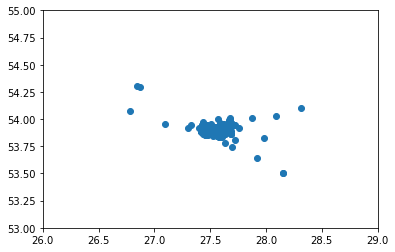

In [168]:
plt.scatter(df['COORD_X'], df['COORD_Y'])
plt.xlim(26, 29)
plt.ylim(53, 55)

In [10]:
df['shop'] = df['shop'].map(lambda x: int(re.findall(r'\d+', x)[0]) if not pd.isna(x) else x)
df['pharmacy'] = df['pharmacy'].map(lambda x: int(re.findall(r'\d+', x)[0]) if not pd.isna(x) else x)
df['underground'] = df['underground'].map(lambda x: int(re.findall(r'\d+', x)[0]) if not pd.isna(x) else x)

In [157]:
df['area'].unique()

array(['Минская область'], dtype=object)

In [ ]:
def prepare_squares

In [11]:
df

,web-scraper-order,web-scraper-start-url,flat_link,flat_link-href,name,area,city,address,district,underground,rooms,floor,square,height,build_year,toilet,balcony,pol,repair,price,terms_sale,property,shop,pharmacy,updated,agency,video,VIEWS_TODAY,VIEWS_LAST_WEEK,COORD_X,COORD_Y
0,1574508945-407,https://realt.by/sale/flats/,3-комнатная квартира возле метро,https://realt.by/sale/flats/object/1571869/,3-комнатная квартира возле метро,Минская область,г. Минск,"Дзержинского просп., 15 Информация о доме",Московский район,350.0,3 / 3,2 / 19,72.9 / 52.7 / – м²,2.7 м,2018.0,раздельный,2 лоджии застекленные,ламинированные,нормальный ремонт,"202 960 руб, 2 784 руб/кв.м.",чистая продажа,частная,300.0,350.0,2019-11-19,БизнесХаус,NaN,32,284,27.519336,53.887027
1,1574508774-329,https://realt.by/sale/flats/,Новый объект на рынке. Квартира с полным ремон...,https://realt.by/sale/flats/object/1593323/,Новый объект на рынке. Квартира с полным ремон...,Минская область,г. Минск,"Филимонова ул., 14 Информация о доме",Партизанский район,NaN,1 / 1,13 / 19,44.5 / 17.9 / 9.5 м²,2.66 м,2004.0,раздельный,лоджия застекленная,линолеум,хороший ремонт,"143 302 руб, 3 221 руб/кв.м.",чистая продажа,частная,150.0,450.0,2019-11-18,Агентство недвижимости «Центральное»,NaN,16,380,27.635400,53.910700
2,1574508771-328,https://realt.by/sale/flats/,"Продается 4 комнатная квартира, Копище, Авиаци...",https://realt.by/sale/flats/object/1584392/,"Продажа 4-х комнатной квартиры, д. Копище, ул....",Минская область,д. Копище,"Авиационная ул., 3",NaN,NaN,4 / 4,1 / 7,91 / 59.3 / 10.4 м²,2.52 м,2017.0,раздельный,лоджия застекленная,NaN,отличный ремонт,"371 068 руб, 4 078 руб/кв.м.",чистая продажа,частная,550.0,600.0,NaN,NaN,NaN,29,361,27.668600,53.953300
3,1574509508-568,https://realt.by/sale/flats/,Акция - Снижена Цена на Пентхаус!,https://realt.by/sale/flats/object/1601211/,Акция - Снижена Цена на Пентхаус!,Минская область,г. Минск,"Независимости просп., 85/Г Информация о доме",Первомайский район,400.0,3 / 2,9 / 10,118.2 / 91.4 / – м²,3 м,2015.0,раздельный,лоджия,NaN,NaN,"387 715 руб, 3 280 руб/кв.м.",чистая продажа,частная,350.0,250.0,2019-11-21,NaN,NaN,28,712,27.602200,53.924600
4,1574508960-414,https://realt.by/sale/flats/,Продается трёхкомнатная квартира в сталинке в ...,https://realt.by/sale/flats/object/1596913/,Продается трёхкомнатная квартира в сталинке в ...,Минская область,г. Минск,"Маркса ул., 45 Информация о доме",Ленинский район,450.0,3 / 3,5 / 5,82.7 / 52.9 / 8.3 м²,NaN,1954.0,раздельный,балкон,деревянные,удовлетворительный ремонт,"342 367 руб, 4 139 руб/кв.м.",чистая продажа,NaN,450.0,400.0,2019-11-21,Мольнар Сити Центр,NaN,10,248,27.567000,53.902800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1574508995-430,https://realt.by/sale/flats/,Двушка-чешка возле метро!,https://realt.by/sale/flats/object/1519371/,Двушка-чешка возле метро!,Минская область,д. Большое Стиклево,"Фабричная ул., 20",NaN,NaN,2 / 2,5 / 5,53.1 / 29.3 / 8.8 м²,2.6 м,1995.0,раздельный,лоджия застекленная,линолеум,нормальный ремонт,"107 630 руб, 2 028 руб/кв.м.",чистая продажа,частная,450.0,200.0,2019-11-22,7 этажей,NaN,14,37,27.690209,53.859462
257,1574509517-572,https://realt.by/sale/flats/,Трехкомнатная квартира в малоэтажной застройке.,https://realt.by/sale/flats/object/200110/,Трехкомнатная квартира в малоэтажной застройке.,Минская область,г. Минск,"Грибоедова ул., 11 Информация о доме",Центральный район,950.0,3 / 3,2 / 10,165.6 / 67.2 / 33.5 м²,2.88 м,2014.0,2 сан.узла,лоджия застекленная,NaN,евроремонт,"1,27 млн руб, 7 676 руб/кв.м.",чистая продажа,частная,200.0,400.0,2019-10-22,Сильван,NaN,62,966,27.526900,53.914300
258,1574509082-470,https://realt.by/sale/flats/,Лучшая квартира в Веснянке! Самая выгодная цен...,https://realt.by/sale/flats/object/1600307/,Лучшая квартира в Веснянке! Самая выгодная цен...,Минская область,г. Минск,"Тимирязева ул., 90 Информация о доме",Центральный район,NaN,3 / 3,4 / 9,93

In [12]:
df['balcony'] = df['balcony'].map(lambda x: 0 if pd.isna(x) or x == 'нет' else 1)

In [13]:
df['height'] = df['height'].map(lambda x: int(re.findall(r'\d+', x)[0]) if not pd.isna(x) else x)

In [179]:
df['toilet'].value_counts()

раздельный     158
совмещенный     53
2 сан.узла      37
3 сан.узла       3
Name: toilet, dtype: int64

In [18]:
def ter_sale(df):
    for i in range(df.shape[0]):
        if df['terms_sale'][i] == 'чистая продажа':
            df['terms_sale'][i] = 0
        else:
            df['terms_sale'][i] = 1
            
    return df

In [19]:
df = ter_sale(df)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
def price_prep(s):    
    if s == 'Цена договорная':
        return float('nan')
    
    if s.find('млн') != -1:        
        s = s[:s.find('млн')].replace('\xa0', '')        
        return int(float(s.replace(',', '.'))*1000000)
    
    return int(s.split(',')[0].replace('руб', '').replace('\xa0', ''))
    
    #(\d+[,\d+]*)
     
df['PRICE'] = df['PRICE'].map(price_prep)
df = df[~df['PRICE'].isna()]

In [18]:
df

,NAME,VIEWS_NUM,AREA,COORD_X,COORD_Y,CITY,ADDRESS,DISTRICT,UNDERGROUND,ROOMS,...,POL,REPAIR,PRICE,TERMS_SALE,PROPERTY,SHOP,PHARMACY,UPDATED,AGENCY,VIDEO
0,"Продажа двухкомнатной квартиры в Бресте, ул. К...","просмотров: сегодня – 14, за последние 7 дней...",Брестская область,23.702414,52.093037,г. Брест,Кирова ул.,NaN,NaN,2 / 2,...,NaN,хороший ремонт,108655,обмен,частная,~ 100,~ 300,2019-08-24,АЛЬТЕРНАТИВА Брест,Фотографии и планировки объекта:
1,"Продажа 2-х комнатной квартиры в г. Гродно, пр...","просмотров: сегодня – 9, за последние 7 дней ...",Гродненская область,23.826022,53.675264,г. Гродно,NaN,NaN,NaN,2 / 2,...,ламинированные,евроремонт,108655,чистая продажа,частная,~ 250,~ 350,2019-10-03,NaN,Фотографии и планировки объекта:
2,Двухкомнатная квартира на улице Сурганова,"просмотров: сегодня – 9, за последние 7 дней ...",Могилевская область,30.311008,53.921510,г. Могилев,"Сурганова ул., 12",NaN,NaN,2 / 2,...,ламинированные,отличный ремонт,108655,чистая продажа,частная,NaN,NaN,2019-06-12,Империя жилья,Фотографии и планировки объекта:
3,2-хкомнатная квартира на Турова,"просмотров: сегодня – 10, за последние 7 дней...",Могилевская область,30.366255,53.944845,г. Могилев,"Турова ул., 18",NaN,NaN,2 / 2,...,линолеум,NaN,108655,чистая продажа,частная,NaN,NaN,2019-11-14,Золотой Актив,Фотографии и планировки объекта:
4,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...","просмотров: сегодня – 16, за последние 7 дней...",Минская область,27.529830,53.868137,г. Минск,Кижеватова ул.,Октябрьский район,NaN,Фактически 2-комнатная квартира. Свободная пла...,...,NaN,NaN,108860,чистая продажа,долевое строительство,~ 450,~ 500,NaN,ООО «Агентство недвижимости «Этажи»,Фотографии и планировки объекта:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...","просмотров: сегодня – 6, за последние 7 дней ...",Минская область,27.535964,53.867944,г. Минск,Аэродромная ул.,Октябрьский район,NaN,2 / 2,...,NaN,NaN,144696,чистая продажа,долевое строительство,~ 350,~ 850,NaN,ООО «Агентство недвижимости «Этажи»,Фотографии и планировки объекта:
971,"Продажа 2-х комнатной квартиры, г. Заславль, у...","просмотров: сегодня – 6, за последние 7 дней ...",Минская область,27.275349,54.007829,г. Заславль,"Советская ул., 63/1",NaN,NaN,2 / 2,...,ламинированные,отличный ремонт,145352,чистая продажа,частная,~ 600,NaN,2019-11-03,NaN,Фотографии и планировки объекта:
972,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...","просмотров: сегодня – 4, за последние 7 дней ...",Минская область,27.551132,53.871281,г. Минск,"Аэродромная ул., 28",Октябрьский район,"м. Ковальская Слобода (2020), расстояние ≈750м...",Свободная планировка (2-комнатная),...,бетонная стяжка,без отделки,145352,чистая продажа,частная,~ 550,~ 600,2019-11-22,Академ-недвижимость,Фотографии и планировки объекта:
973,"Продажа 2-х комнатной квартиры, г. Минск, ул. ...","просмотров: сегодня – 51, за последние 7 дней...",Минская область,27.551915,53.881177,г. Минск,"Жуковского ул., 9/1 Информация о доме",Октябрьский район,"м. Институт культуры, расстояние ≈1000м, (Моск...",2 / 2,...,линолеум,хороший ремонт,145352,чистая продажа,гос.-приватизированная,~ 350,~ 200,2019-11-21,NaN,Фотографии и планировки объекта:


In [23]:
df.loc[df.video == '3D тур по недвижимости:', 'video'] = 1
df.loc[df.video == 'Видеоролик об объекте:', 'video'] = 2
df.loc[df.video.isna(), 'video'] = 0

df.loc[df.agency.notna(), 'agency'] = 1
df.loc[df.agency.isna(), 'agency'] = 0

df.loc[df.property != 'частная', 'property'] = 0
df.loc[df.property == 'частная', 'property'] = 1

df.loc[df.repair == 'евроремонт', 'repair'] = 3
df.loc[df.repair == 'отличный ремонт', 'repair'] = 3
df.loc[df.repair == 'хороший ремонт', 'repair'] = 2
df.loc[df.repair == 'нормальный ремонт', 'repair'] = 1
df.loc[df.repair == 'удовлетворительный ремонт', 'repair'] = 1
df.loc[df.repair == 'строительная отделка', 'repair'] = 0
df.loc[df.repair == 'без отделки', 'repair'] = 0
df.loc[df.repair == 'аварийное состояние', 'repair'] = 0
df.loc[df.repair == 'плохое состояние', 'repair'] = 0

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
